In [1]:
%matplotlib inline
import rootpy.ROOT as R
R.gROOT.SetBatch(True)
import numpy as np
from rootpy.io import root_open, DoesNotExist
from rootpy.plotting import Canvas, Hist, Legend
import rootpy.plotting.root2matplotlib as rplt
import matplotlib.pyplot as plt

In [15]:
f = root_open( "/Users/danielbrandenburg/bnl/local/work/rcpMaker/products/15/presentation/data.root" );

In [52]:
def getEvanSpectra( en, plc, c, cl, ch ) :
    ef = root_open( "/Users/danielbrandenburg/bnl/local/work/rcpMaker/script/evan/spectra_" + en + ".root" )
    he = ef.Get( plc + "_" + c + "_" + str(cl) + "_" + str(ch) )
    return he

    
def getSpectra( plc, c, cen ) :
    hm = f.Get(  "yield/yield_" + plc + "_" + cen + "_" + c + "_0" ).Clone( plc+c+cen )
    #hm.Scale( 2 / .58 )
    return hm

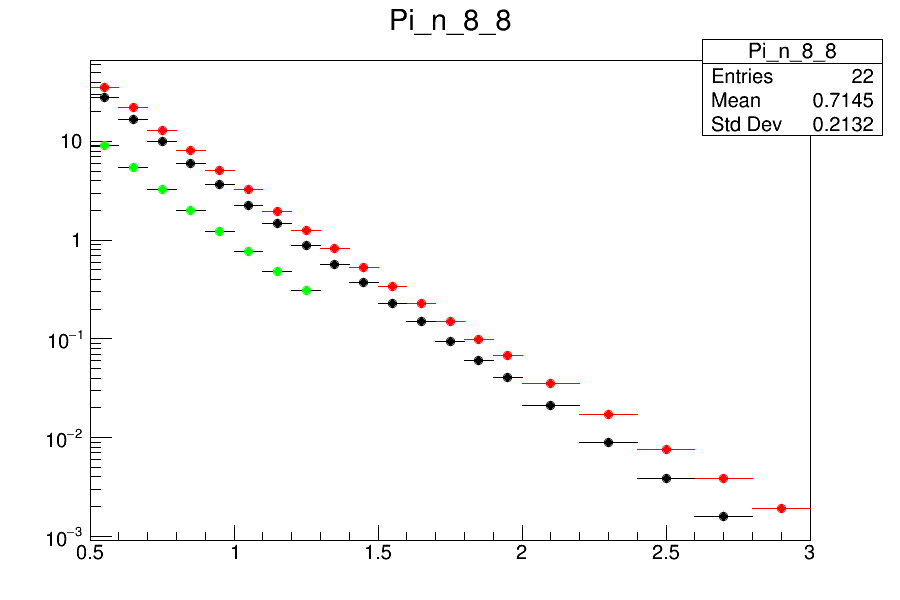

In [53]:
can = Canvas( width=900, height=600 )
plc = "Pi"
c = "n"
h7 = getEvanSpectra( "7.7", plc, c, 0, 1 )
h11 = getEvanSpectra( "11.5", plc, c, 8, 8 )
h19 = getEvanSpectra( "19.6", plc, c, 8, 8 )
h15 = getSpectra( plc, c, "0" )

h19.SetLineColor( R.kRed )
h19.SetMarkerColor( R.kRed )


h19.Draw()
h19.GetXaxis().SetRangeUser(0.5, 3)
h11.Draw("same")
h15.SetMarkerColor( R.kGreen )
h15.Draw( "same" )

R.gPad.SetLogy(1)
can

In [41]:
def ratioSpectra( h1, h2 ) :
    hh2 = h1.Clone( "h2a" )
    for ib in range( 1, h1.GetNbinsX() + 1  ) :
        hh2

h19 = getEvanSpectra( "19.6", plc, c, 0, 1 )
h15r = getSpectra( plc, c, "6" ).Clone( "ratio19" )

h15r.Divide( h19 )
# h15r.Draw()
# can

DoesNotExist: requested path 'yield/yield_Pi_6_n_0' does not exist in /Users/danielbrandenburg/bnl/local/work/rcpMaker/products/15/presentation/data.root